In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
from scipy import signal
from scipy.fftpack import fft

import pandas as pd
import os

In [3]:
# pwd
# var = pd.read_csv(r"/Users/utkarshtripathi/Documents/PlatformIO/Projects/test.csv")
# var.head() #check starting lines of dataset

# Part-1: Analyzing simulated EMG signal
- Create a simulated signal 
- Use baseline offset correction and check results
- Fourier Transform example for sine wave
- FFT for simulated signal
- Use butterworth filter on signal
- Analyze fourier transform of filtered signal

In [4]:
# simulated EMG signal [emg1: with offset and emg2: without offset]
burst1 = np.random.uniform(-1, 1, size=500) + 0.08 # 800 samples between -1 and +1 Volts
burst2 = np.random.uniform(-1, 1, size=500) + 0.08
quiet = np.random.uniform(-0.05, 0.05, size=500) + 0.08

burst1x = np.random.uniform(-1, 1, size=500) # 800 samples between -1 and +1 Volts
burst2x = np.random.uniform(-1, 1, size=500)
quietx = np.random.uniform(-0.05, 0.05, size=500)

emg1 = np.concatenate([quiet, burst1, quiet, burst2, quiet])
emg2 = np.concatenate([quietx, burst1x, quietx, burst2x, quietx])

time = np.array([i/1000 for i in range(0, len(emg1), 1)]) # sampling rate 1000 Hz
# generate a **list** of integer values ranging from 0 to the length of the variable emg


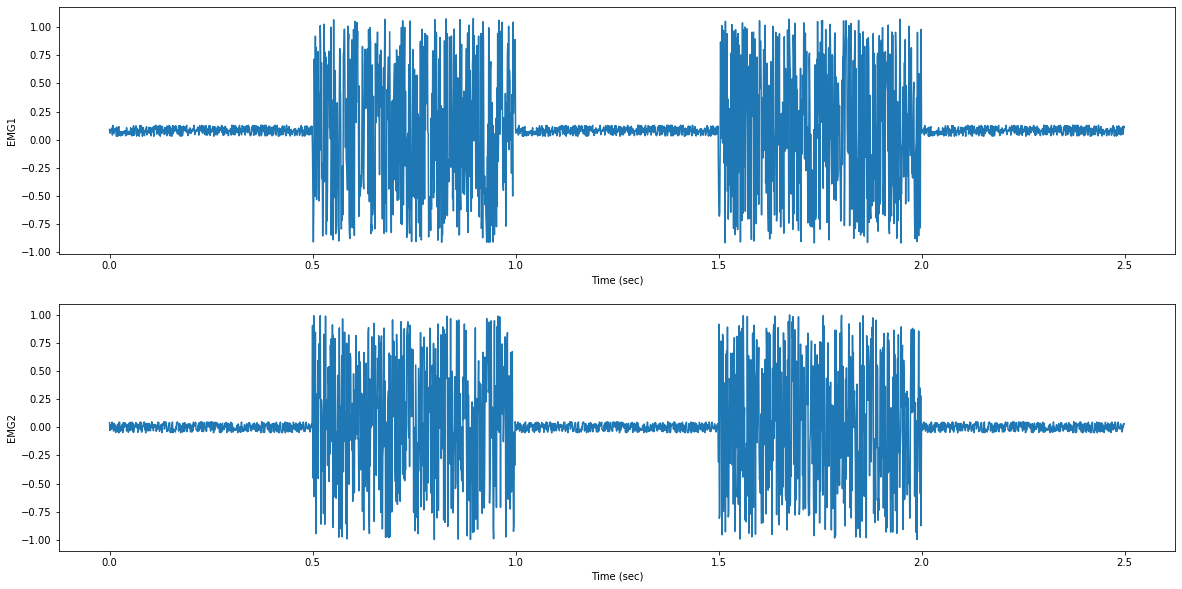

In [5]:
# plot EMG1 signal
fig = plt.figure()

plt.subplot(2,1,1)
plt.plot(time, emg1)
plt.xlabel('Time (sec)')
plt.ylabel('EMG1')

plt.subplot(2,1,2)
plt.plot(time, emg2)
plt.xlabel('Time (sec)')
plt.ylabel('EMG2')

fig.set_size_inches(w=20,h=10)
# fig.savefig('emg2.png')


In [6]:
# Baseline offset is not zero, solving:
# %whos # for checking variables
print ('Mean for first simulated emg signal' , np.mean(emg1))
print ('Mean for second simulated emg signal' , np.mean(emg2))

Mean for first simulated emg signal 0.08440364490990958
Mean for second simulated emg signal 0.01589566443347265


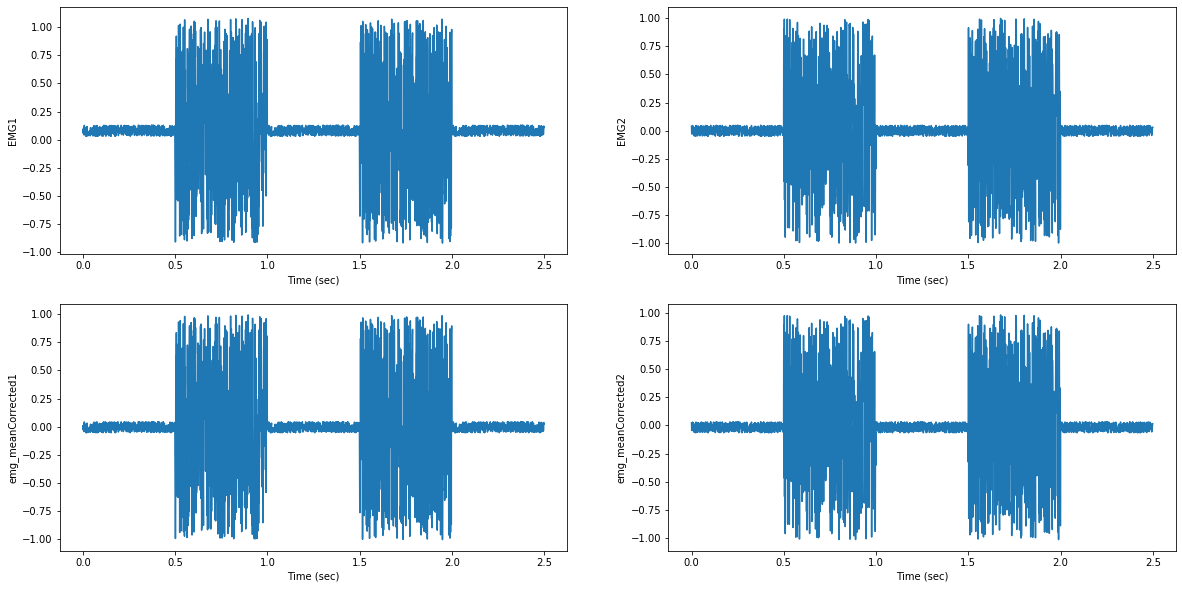

In [7]:
## Mean corrections [emg1: with offset and emg2: without offset]
emg_meanCorrected1 = emg1 - np.mean(emg1)
emg_meanCorrected2 = emg2 - np.mean(emg2)

# plot EMG1 signal
fig = plt.figure()

plt.subplot(2,2,1)
plt.plot(time, emg1)
plt.xlabel('Time (sec)')
plt.ylabel('EMG1')

plt.subplot(2,2,2)
plt.plot(time, emg2)
plt.xlabel('Time (sec)')
plt.ylabel('EMG2')

plt.subplot(2,2,3)
plt.plot(time, emg_meanCorrected1)
plt.xlabel('Time (sec)')
plt.ylabel('emg_meanCorrected1')

plt.subplot(2,2,4)
plt.plot(time, emg_meanCorrected2)
plt.xlabel('Time (sec)')
plt.ylabel('emg_meanCorrected2')

fig.set_size_inches(w=20,h=10)

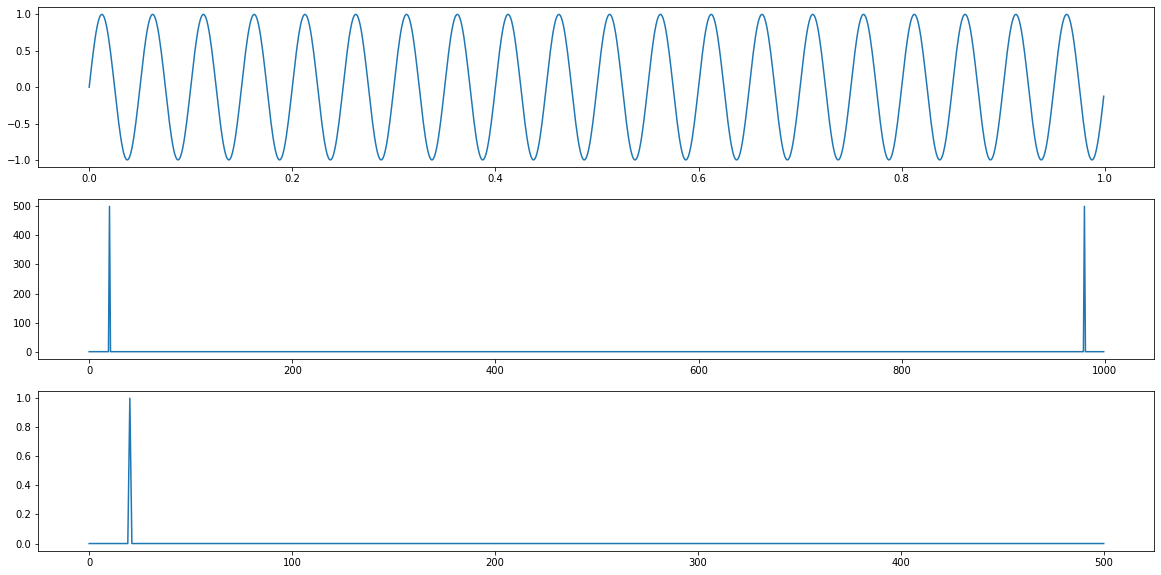

In [8]:
### Python fft testing with only sine wave to create the right fft

Fs = 1000 # Sampling frequency
sineFreq = 20
# t = np.linspace(0, 2, 100)
tx = np.arange(start=0, stop=1, step=1/Fs) # step == dt

# print(t)
# print(tx)

x = np.sin(2*np.pi*sineFreq * tx)
X = fft(x)

# Plot sine wave
fig = plt.figure()

plt.subplot(3,1,1)
plt.plot (tx,x)

# Plot abs(fft(x))
plt.subplot(3,1,2)
plt.plot (abs(X)) # incorrect plot

## Frequency axis creation
n = np.size(tx)
freq_axis = (Fs/2) * np.linspace (0,1,n/2) # frequency axis: 0->500 Hz and generate half spectrum
X_corrected = abs( X[0:np.size(freq_axis)] ) * (2/n)

plt.subplot(3,1,3)
plt.plot (freq_axis,X_corrected) # Correct plot
fig.set_size_inches(w=20,h=10)


[0.000e+00 1.000e-03 2.000e-03 ... 2.497e+00 2.498e+00 2.499e+00] 2500


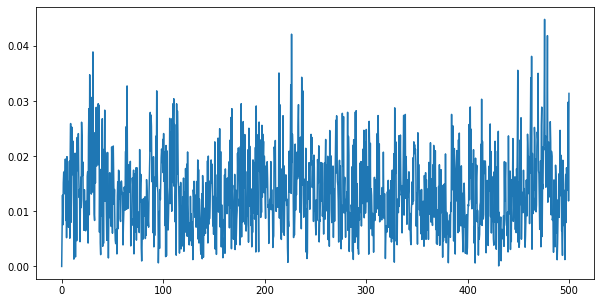

In [9]:
## Fourier transform on EMG signals. NOTE:
# emg1: with offset and emg2: without offset
# emg_meanCorrected1 emg_meanCorrected2
# FFT_emg_normalized => FT of emg_meanCorrected1

Fs_emg = 1000 # Sampling frequency (see first block)
print(time, np.size(time))

FFT_emg = fft(emg_meanCorrected1)

## Frequency axis creation
n_emg = np.size(time)
freq_axis_emg = (Fs/2) * np.linspace (0,1,n_emg/2) # frequency axis: 0->500 Hz and generate half spectrum
FFT_emg_normalized = abs( FFT_emg[0:np.size(freq_axis_emg)] ) * (2/n_emg)

fig = plt.figure()
plt.plot (freq_axis_emg,FFT_emg_normalized)
fig.set_size_inches(w=10,h=5)

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


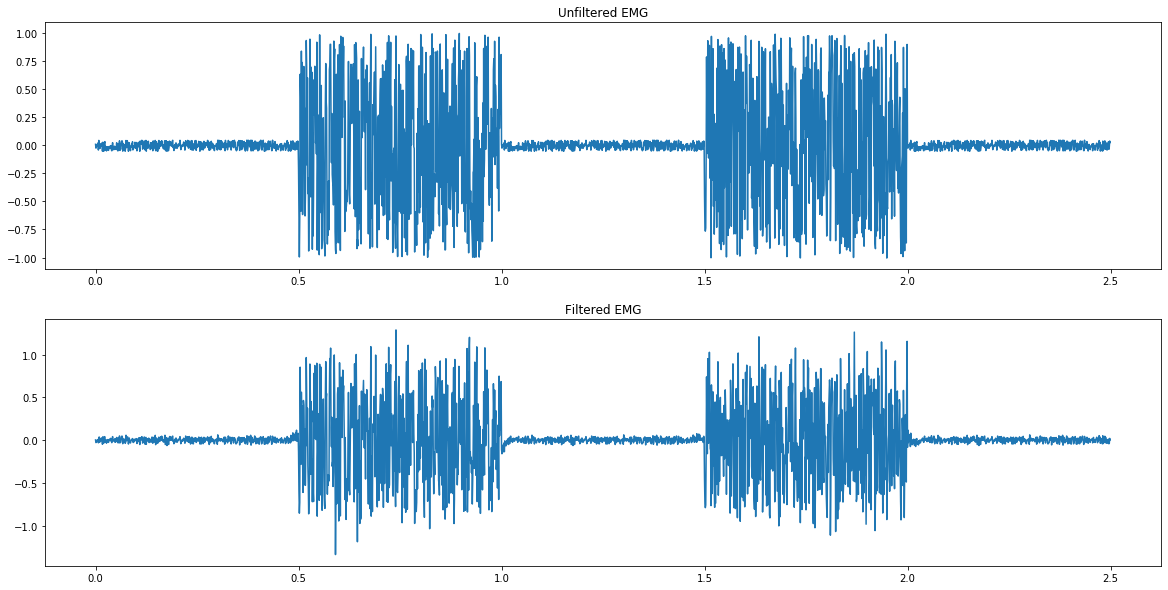

In [10]:
## BANDPASS FILTERING
## Comparison of ---FFT_emg_normalized--- and ---FFT_emg_filtered_normalized---

# Slow oscillations in the EMG signal -> movement artefacts 
# Fast oscillations -> unwanted electrical noise
# Add bandpass filter to avoid both (20-450 Hz) :

high = 20/(Fs/2)
low = 450/(Fs/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# Process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_meanCorrected1)

# "TIME DOMAIN" plot comparison of unfiltered and filtered EMG
fig = plt.figure()
fig.set_size_inches(w=11,h=7)

plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1).set_title('Unfiltered EMG')
plt.plot(time, emg_meanCorrected1)

plt.subplot(2, 1, 2)
plt.subplot(2, 1, 2).set_title('Filtered EMG')
plt.plot(time, emg_filtered)
fig.set_size_inches(w=20,h=10)



/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


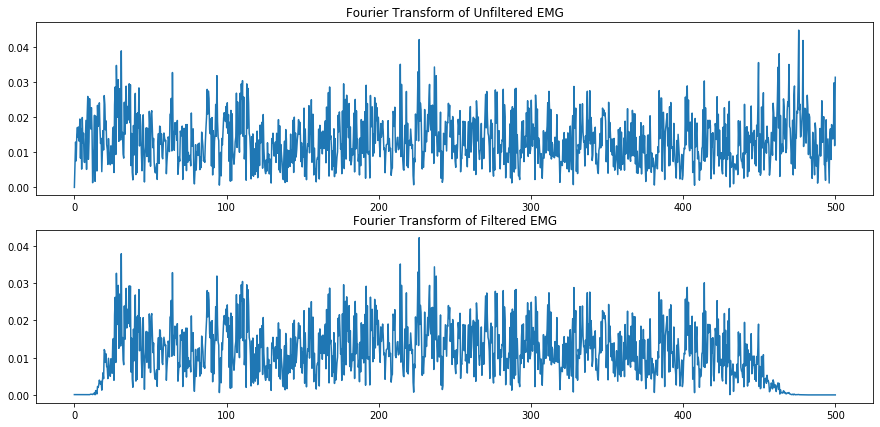

In [11]:
# FFT_emg_normalized => FT of emg_meanCorrected1
# FFT_emg_filtred_normalized => FT of emg_filtered

FFT_emg_filtered = fft(emg_filtered)
FFT_emg_filtered_normalized = abs( FFT_emg_filtered[0:np.size(freq_axis_emg)] ) * (2/n_emg)

# "FREQUENCY DOMAIN" plot comparison of unfiltered and filtered EMG
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1).set_title('Fourier Transform of Unfiltered EMG')
plt.plot(freq_axis_emg, FFT_emg_normalized)

plt.subplot(2, 1, 2)
plt.subplot(2, 1, 2).set_title('Fourier Transform of Filtered EMG')
plt.plot(freq_axis_emg, FFT_emg_filtered_normalized)

fig.set_size_inches(w=15,h=7)


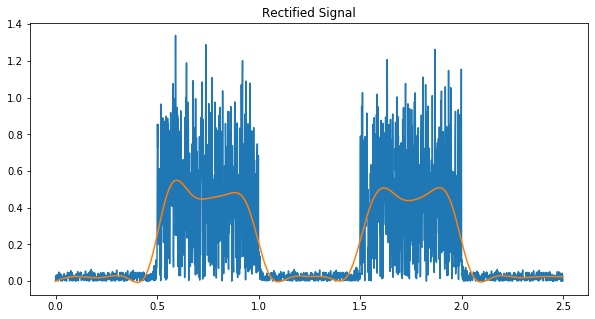

In [12]:
## Rectification of signal - take abs
RECT_emg_filtered = abs (emg_filtered)
fig = plt.figure()
fig.set_size_inches(w=10,h=5)
plt.title('Rectified Signal')
plt.plot(time, RECT_emg_filtered)

low_pass = 10
low_pass = low_pass/Fs
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = sp.signal.filtfilt(b2, a2, RECT_emg_filtered)
plt.plot(time, emg_envelope)



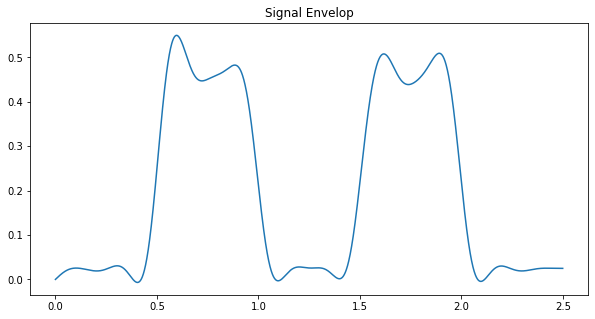

In [13]:
## EMG Envelop generation

# Use a low pass filter to capture the shape or “envelope” of the EMG signal -> 
# better reflects force generated by a muscle

low_pass = 10
low_pass = low_pass/Fs
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = sp.signal.filtfilt(b2, a2, RECT_emg_filtered)
fig = plt.figure()
fig.set_size_inches(w=10,h=5)
plt.title('Signal Envelop')
plt.plot(time, emg_envelope)



# Part-2: Stochastic Signal Analysis and Machine Learning Classification

- Fourier analysis can be used to decompose this signal in its periodic components. Fourier analysis tells us at what the frequency of these periodical component are.
- Defining function to quickly calculate fft as and when required

### Power Spectral Density and Auto-correlation
PSD:
- Frequency distribution + Power distribution at each frequency
- The surface below the peaks corresponds with the power distribution at that frequency.

Autocorrelation:
- correlation of a signal with a time-delayed version of itself
- if a signal contain a pattern which repeats itself after a time-period of \tau seconds, there will be a high correlation between the signal and a \tau sec delayed version of the signal.



In [14]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

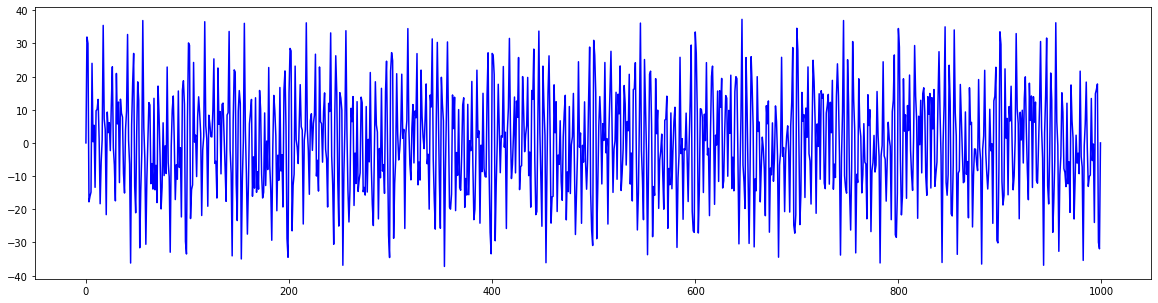

In [15]:
from scipy.signal import welch # for PSD

t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14, 10]
frequencies = [1, 24, 13, 18, 20, 54]
y_values = [amplitudes[ii] * np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

# print(y_values)

# Use the function defined above (makes use of Sci)
f_values_fft, fft_values = get_fft_values(composite_y_value, T, N, f_s) ## FFT
f_values_psd, psd_values = welch (composite_y_value, f_s) ## PSD

fig = plt.figure()
plt.plot(composite_y_value, color='blue')
fig.set_size_inches(w=20,h=5)

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


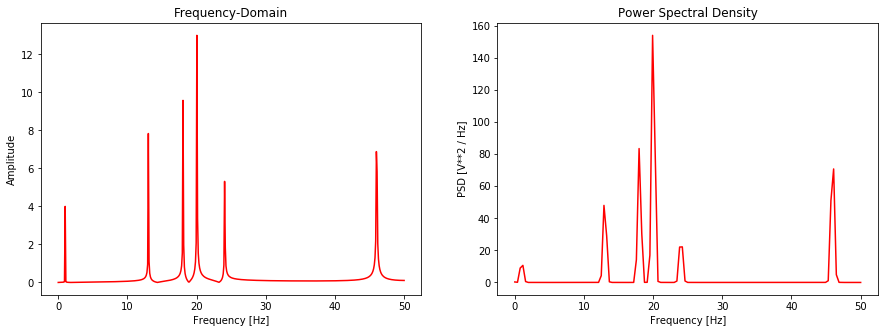

In [16]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Frequency-Domain')
plt.plot(f_values_fft, fft_values, linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') ##

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Power Spectral Density')
plt.plot(f_values_psd, psd_values, color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')

fig.set_size_inches(w=15,h=5)

In [17]:
# from autocorrelation import autocorr
# from autocorrelation import get_autocorr_values

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/utkarshtripathi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


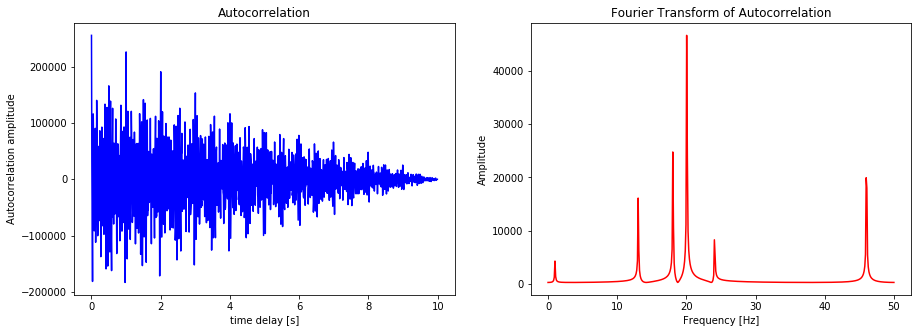

In [18]:
# Autocorrelation calculation
t_values, autocorr_values = get_autocorr_values(composite_y_value, T, N, f_s)

# Checking the FFT of autocorrelation calculated above (should be very similar to FFT of original signal)
f_values_ac, fft_values_ac = get_fft_values(autocorr_values, T, N, f_s) 

# Plot both autocorrelation and frequency domain
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Autocorrelation')
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Fourier Transform of Autocorrelation')
plt.plot(f_values_ac, fft_values_ac, linestyle='-', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') ##

fig.set_size_inches(w=15,h=5)

Now extract features from each of these transformed signals (FFT, PSD and AutoCorrelation) and use these **features as input** in standard classifiers like Random Forest, Logistic Regression, Gradient Boosting or Support Vector Machines. One of these features is (peaks' frequency and amplitude) -> So need to find the peak first and find the corresponding frequency. 

#### FINDING PEAKS IN FREQUENCY DOMAIN

NOTE THE FOLLOWING: (https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/58888/versions/1/previews/Averaged_loop_example/fndpks.m/index.html)

* find only those peaks that are greater than MINPEAKHEIGHT MPH. Specifying a minimum peak height may help in reducing the processing time. MPH is a real valued scalar. The default value of MPH is -Inf.

* finds peaks that are at least separated by MINPEAKDISTANCE MPD. MPD is a positive integer valued scalar. This parameter may be specified to ignore smaller peaks that may occur in close proximity to a large local peak. For example, if a large local peak occurs at index N, then all smaller peaks in the range (N-MPD, N+MPD) are ignored. If not specified, MPD is assigned a value of one. 



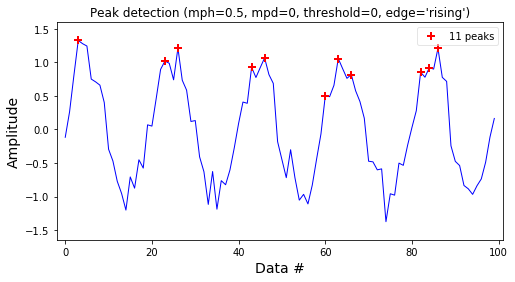

In [19]:
# %load detect_peaks.py
# function detect_peaks is present in the same folder as the notebook

from detect_peaks import detect_peaks 

x = np.sin(2*np.pi*5*np.linspace(0, 1, 100)) + (np.random.randn(100))/5
# set minimum peak height = 0.5 and minimum peak distance = 0
ind = detect_peaks(x, mph=0.5, mpd=0, show=True)

# x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
# # detection of valleys instead of peaks
# detect_peaks(x, mph=-1.2, mpd=20, valley=True, show=True)


In [20]:
## Finding Peaks in the FFT (calculated above) as one of the features

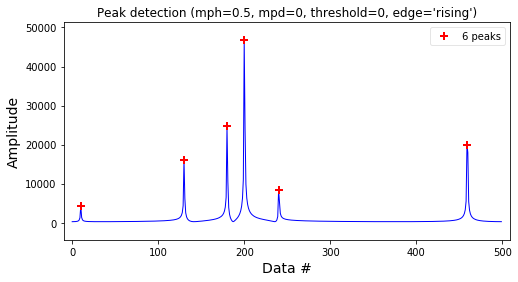

In [21]:

i2 = detect_peaks(fft_values_ac, mph=0.5, mpd=0, show=True)
